# Loading and cleaning up the dataset

In [126]:
# Importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [127]:
df = pd.read_excel('2019_Winter_Challenge_DataSet.xlsx')

## Looking at the dataset dimensions and getting an overview: 

In [128]:
df.shape

(5000, 7)

In [129]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [130]:
# Check how many NANs exist in dataset
df.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [131]:
# Checking if all the orders are dated within a 30-day window
df['created_at'].max() - df['created_at'].min()

Timedelta('29 days 23:47:26.229000')

## Cleaning up the dataset

In [132]:
# Removing the orders with NAN values
df.dropna(inplace=True)
# Removing the orders with negative order_amount or total_items values
df.drop(df[df['order_amount'] < 0].index, axis=0, inplace=True)
df.drop(df[df['total_items'] < 0].index, axis=0, inplace=True)

In [133]:
# Removing the orders that are not within the 30-day window from the earliest order
df.drop(df[df['created_at'] > (df['created_at'].min()) + timedelta(30)].index, axis=0, inplace=True)

# Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

## Part a

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

### Answer: 

One way to understand the customers’ purchasing habits and evaluating online marketing and pricing is measuring the AOV metric:

The AOV of 3145.13 is obtained from the above equation and is in other words the average of ‘order_amount’ (SUM(‘order_amount’) / Number of Orders): 

In [134]:
# Get the mean of the 'order_amount' column
print("Mean of the order amount:", df['order_amount'].mean())

Mean of the order amount: 3145.128


This AOV can be misleading as the orders with largely different sizes contribute to this average without being normalized (i.e., the order with 2000 items is considered similarly to an order with one item). Therefore, this AOV cannot be an accurate measurement metric for evaluating the marketing and pricing strategies when having orders with largely different sizes. Comparing the mean and median of the data suggests that there are some big outliers that make the mean very biased.

In [135]:
# Get the median of the 'order_amount' column
print("Median of the order amount:", df['order_amount'].median())

Median of the order amount: 284.0


According to the statistics of the dataset shown below, 75% of the order_amount have a value under 390 while the maximum is a huge outlier of 704000. This basically makes this AOV an inappropriate metric. 

In [136]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


Looking at the distribution of the order_amount confirms this observation as well:

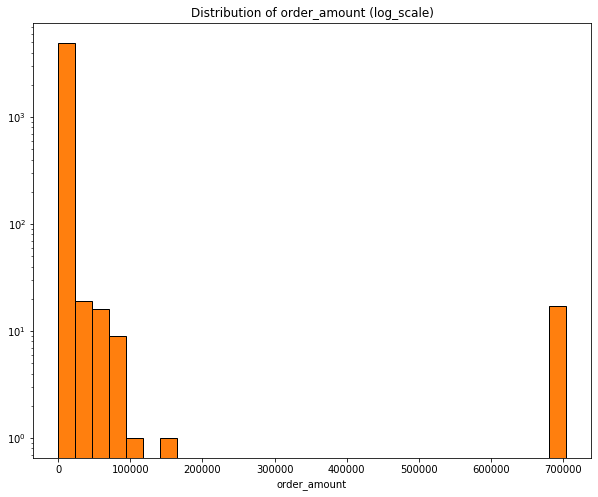

In [137]:
# Plotting the histogram for order_amount using log-scale for y-axis
_ = plt.figure(figsize=[10, 8])
_ = plt.hist(df.order_amount, bins=30, color='C1', ec='black', log=True)
_ = plt.xlabel('order_amount')
_ = plt.title('Distribution of order_amount (log_scale)')

One way to overcome this problem is to mask the outliers to get a more reasonable AOV value. As calculated below, if the outlier orders with amount above 10000 are masked, the obtained AOV is 302.58 which is a much more reasonable value. However, this is still not the best choice and seems kind of arbitrary. So, in the next part of the question, a better metric to evaluate this dataset is discussed.

In [138]:
masked_df = df[df['order_amount'] <= 10000]
# Get the mean of the 'order_amount' column
print("Mean of the order amount:", masked_df['order_amount'].mean())

Mean of the order amount: 302.58051448247926


## Parts b and c

b. What metric would you report for this dataset?

c. What is its value?

### Answer:

Although the number of orders is considered to calculate the AOV, the number of purchased items (‘tot_items’) per order is ignored when calculating the above AOV. 
A better metric to evaluate this dataset to enable better marketing strategies is to use a normalized metric. Therefore, for each order, the ‘order_amount’ is divided by the ‘tot_items’ to find the ‘order_amount_per_item’. Then, an average over the normalized metirc ‘order_amount_per_item’ can be used as an appropriate evaluation metric.

In [139]:
df['order_amount_per_item']= df['order_amount'] / df['total_items'] 

In [140]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_amount_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773,156.0


Then, the new metric of Average Order Value per Item (AOVI) is calculated as 387.74.

In [141]:
print("Mean of the order amount per item:", df['order_amount_per_item'].mean())

Mean of the order amount per item: 387.7428
